In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

In [2]:
V1_1 = pd.read_csv('./19_data/V1_1.csv', sep = ',', skipinitialspace = True)

V1_1_x = V1_1['pos'].str.strip().drop(index = 0).dropna(axis = 'index')
V1_1_E = V1_1['E'].str.strip().drop(index = 0).dropna(axis = 'index')



#V1_1
#V1_1_x, V1_1_E

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


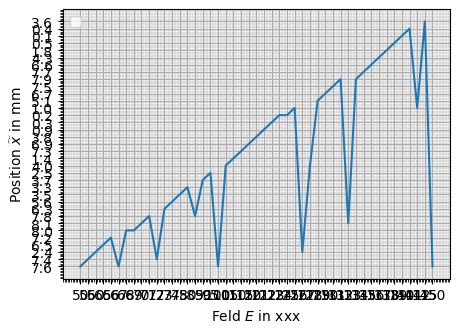

In [5]:
fig, ax = plt.subplots(figsize=(5,3.5))




#ax.set_title(r'Korrigierte Steigungen $mr^2$ für variierte Kugelradien')  
ax.set_xlabel(r'Feld $E$ in xxx')
ax.set_ylabel(r'Position $\widetilde{x}$ in mm')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
#ax.errorbar(Q, Q_tilde, Q_tilde_err, xerr = Q_err, fmt='.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'Messwerte mit Fehlerbalken')
#ax.plot(xplot, xplot*params_gamma[0]+params_gamma[1],  color = 'red', alpha = 0.75, linewidth=1.5, label = 'lineare Regression', linestyle = '--')
ax.plot(V1_1_x, V1_1_E)
ax.legend()
ax.legend(loc="upper left")
plt.savefig('./19_Mikrowellen/V1_1.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()